In [2]:
import pandas as pd
import json
from sodapy import Socrata
import geopandas as gpd
import util
from shapely.geometry import Point
#import googlemaps
import creds
%reload_ext autoreload
%autoreload 2

In [3]:
homicides = util.variable_by_tract('homicides')
buss_licences = util.variable_by_tract('buss_licences')
building_violations = util.variable_by_tract('building_violations')
vehicle_theft = util.variable_by_tract('vehicle_theft')
burglary = util.variable_by_tract('burglary')
robbery = util.variable_by_tract('robbery')
public_peace_violation = util.variable_by_tract('public_peace_violation')
weapons_violation = util.variable_by_tract('weapons_violation')
sexual_assault = util.variable_by_tract('sexual_assault')
public_peace_violation = util.variable_by_tract('public_peace_violation')
rodents = util.variable_by_tract('rodents')
garbage = util.variable_by_tract('garbage')
sanitation = util.variable_by_tract('sanitation')
abandon_vehicles = util.variable_by_tract('abandon_vehicles')
pot_holes = util.variable_by_tract('pot_holes')
tree_trims = util.variable_by_tract('tree_trims')
street_lights = util.variable_by_tract('street_lights')

In [ ]:
# 'buss_licences',
# 'building_violations',
# 'vehicle_theft',
# 'burglary',
# 'robbery',
# 'public_peace_violation',
# 'weapons_violation',
# 'sexual_assault',
# 'homicides',
# 'rodents',
# 'garbage',
# 'sanitation',
# 'abandon_vehicles',
# 'pot_holes',
# 'tree_trims',
# 'street_lights'

In [6]:
df_list = [
    buss_licences,
    building_violations,
    vehicle_theft,
    burglary,
    robbery,
    public_peace_violation,
    weapons_violation,
    sexual_assault,
    homicides,
    rodents,
    garbage,
    sanitation,
    abandon_vehicles,
    pot_holes,
    tree_trims,
    street_lights
]

In [5]:
tree_trims['year']=tree_trims['year'].astype(int)

In [7]:
complete = util.merge_several_df(df_list)

In [8]:
complete = complete.fillna(0)

In [9]:
complete.to_csv('clean_data/raw_complete_dataportal.csv', index=False)

In [10]:
acs_2012 = pd.read_csv('clean_data/acs_2012.csv')
acs_2013 = pd.read_csv('clean_data/acs_2013.csv')
acs_2014 = pd.read_csv('clean_data/acs_2014.csv')
acs_2015 = pd.read_csv('clean_data/acs_2015.csv')
acs_2016 = pd.read_csv('clean_data/acs_2016.csv')
acs_2017 = pd.read_csv('clean_data/acs_2017.csv')

In [66]:
comp_2012 = complete[complete['year']==2012]
comp_2012['tract'] = comp_2012['tract'].astype(int)
comp_2012 = comp_2012.merge(acs_2012, how='left', on='tract')
comp_2012.drop(['year','NAME', 'state', 'county', 'S1401_C01_029E', 'S1401_C01_030E', 'S1501_C02_014E', 'S1501_C02_015E'], axis=1, inplace=True)
cols = list(comp_2012.columns)
info = [[int(r['tract']), r['buss_licences']/(r['S0101_C01_001E']/1000), r['building_violations']/(r['S0101_C01_001E']/1000),
       r['vehicle_theft']/(r['S0101_C01_001E']/1000), r['burglary']/(r['S0101_C01_001E']/1000),
         r['robbery']/(r['S0101_C01_001E']/1000), r['public_peace_violation']/(r['S0101_C01_001E']/1000),
       r['weapons_violation']/(r['S0101_C01_001E']/1000), r['sexual_assault']/(r['S0101_C01_001E']/1000), 
         r['homicides'], r['rodents']/(r['S0101_C01_001E']/1000),r['garbage']/(r['S0101_C01_001E']/1000), 
         r['sanitation']/(r['S0101_C01_001E']/1000), r['abandon_vehicles']/(r['S0101_C01_001E']/1000), 
         r['pot_holes']/(r['S0101_C01_001E']/1000), r['tree_trims']/(r['S0101_C01_001E']/1000),
       r['street_lights']/(r['S0101_C01_001E']/1000), r['S0101_C01_001E'], r['S1101_C01_002E'], 
         r['S1401_C02_001E'], r['S1401_C02_030E'], r['S1501_C02_002E'], 
         r['S1501_C02_008E'], r['S1601_C02_003E'], r['S1701_C03_001E'],
       r['S1810_C03_001E'], r['S1901_C01_012E'], r['S2201_C02_001E'], r['S2301_C03_001E'],
       r['S2701_C03_001E']] for i, r in comp_2012.iterrows() if r['S0101_C01_001E']>0]
comp_2012 = pd.DataFrame(info, columns=cols)
comp_2012.to_csv('clean_data/complete_2012.csv', index=False)

C:\Users\jesus\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
comp_2013 = complete[complete['year']==2013]
comp_2013['tract'] = comp_2013['tract'].astype(int)
comp_2013 = comp_2013.merge(acs_2013, how='left', on='tract')
comp_2013.drop(['year','NAME', 'state', 'county', 'S1401_C01_029E', 'S1401_C01_030E', 'S1501_C02_014E', 'S1501_C02_015E'], axis=1, inplace=True)
cols = list(comp_2013.columns)
info = [[int(r['tract']), r['buss_licences']/(r['S0101_C01_001E']/1000), r['building_violations']/(r['S0101_C01_001E']/1000),
       r['vehicle_theft']/(r['S0101_C01_001E']/1000), r['burglary']/(r['S0101_C01_001E']/1000),
         r['robbery']/(r['S0101_C01_001E']/1000), r['public_peace_violation']/(r['S0101_C01_001E']/1000),
       r['weapons_violation']/(r['S0101_C01_001E']/1000), r['sexual_assault']/(r['S0101_C01_001E']/1000), 
         r['homicides'], r['rodents']/(r['S0101_C01_001E']/1000),r['garbage']/(r['S0101_C01_001E']/1000), 
         r['sanitation']/(r['S0101_C01_001E']/1000), r['abandon_vehicles']/(r['S0101_C01_001E']/1000), 
         r['pot_holes']/(r['S0101_C01_001E']/1000), r['tree_trims']/(r['S0101_C01_001E']/1000),
       r['street_lights']/(r['S0101_C01_001E']/1000), r['S0101_C01_001E'], r['S1101_C01_002E'], 
         r['S1401_C02_001E'], r['S1401_C02_030E'], r['S1501_C02_002E'], 
         r['S1501_C02_008E'], r['S1601_C02_003E'], r['S1701_C03_001E'],
       r['S1810_C03_001E'], r['S1901_C01_012E'], r['S2201_C02_001E'], r['S2301_C03_001E'],
       r['S2701_C03_001E']] for i, r in comp_2013.iterrows() if r['S0101_C01_001E']>0]
comp_2013 = pd.DataFrame(info, columns=cols)
comp_2013.to_csv('clean_data/complete_2013.csv', index=False)

C:\Users\jesus\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
comp_2014 = complete[complete['year']==2014]
comp_2014['tract'] = comp_2014['tract'].astype(int)
comp_2014 = comp_2014.merge(acs_2014, how='left', on='tract')
comp_2014.drop(['year','NAME', 'state', 'county', 'S1401_C01_029E', 'S1401_C01_030E', 'S1501_C02_014E', 'S1501_C02_015E'], axis=1, inplace=True)
cols = list(comp_2014.columns)
info = [[int(r['tract']), r['buss_licences']/(r['S0101_C01_001E']/1000), r['building_violations']/(r['S0101_C01_001E']/1000),
       r['vehicle_theft']/(r['S0101_C01_001E']/1000), r['burglary']/(r['S0101_C01_001E']/1000),
         r['robbery']/(r['S0101_C01_001E']/1000), r['public_peace_violation']/(r['S0101_C01_001E']/1000),
       r['weapons_violation']/(r['S0101_C01_001E']/1000), r['sexual_assault']/(r['S0101_C01_001E']/1000), 
         r['homicides'], r['rodents']/(r['S0101_C01_001E']/1000),r['garbage']/(r['S0101_C01_001E']/1000), 
         r['sanitation']/(r['S0101_C01_001E']/1000), r['abandon_vehicles']/(r['S0101_C01_001E']/1000), 
         r['pot_holes']/(r['S0101_C01_001E']/1000), r['tree_trims']/(r['S0101_C01_001E']/1000),
       r['street_lights']/(r['S0101_C01_001E']/1000), r['S0101_C01_001E'], r['S1101_C01_002E'], 
         r['S1401_C02_001E'], r['S1401_C02_030E'], r['S1501_C02_002E'], 
         r['S1501_C02_008E'], r['S1601_C02_003E'], r['S1701_C03_001E'],
       r['S1810_C03_001E'], r['S1901_C01_012E'], r['S2201_C02_001E'], r['S2301_C03_001E'],
       r['S2701_C03_001E']] for i, r in comp_2014.iterrows() if r['S0101_C01_001E']>0]
comp_2014 = pd.DataFrame(info, columns=cols)
comp_2014.to_csv('clean_data/complete_2014.csv', index=False)

C:\Users\jesus\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
comp_2015 = complete[complete['year']==2015]
comp_2015['tract'] = comp_2015['tract'].astype(int)
comp_2015 = comp_2015.merge(acs_2015, how='left', on='tract')
comp_2015.drop(['year','NAME', 'state', 'county', 'S1401_C01_029E', 'S1401_C01_030E', 'S1501_C02_014E', 'S1501_C02_015E'], axis=1, inplace=True)
cols = list(comp_2015.columns)
info = [[int(r['tract']), r['buss_licences']/(r['S0101_C01_001E']/1000), r['building_violations']/(r['S0101_C01_001E']/1000),
       r['vehicle_theft']/(r['S0101_C01_001E']/1000), r['burglary']/(r['S0101_C01_001E']/1000),
         r['robbery']/(r['S0101_C01_001E']/1000), r['public_peace_violation']/(r['S0101_C01_001E']/1000),
       r['weapons_violation']/(r['S0101_C01_001E']/1000), r['sexual_assault']/(r['S0101_C01_001E']/1000), 
         r['homicides'], r['rodents']/(r['S0101_C01_001E']/1000),r['garbage']/(r['S0101_C01_001E']/1000), 
         r['sanitation']/(r['S0101_C01_001E']/1000), r['abandon_vehicles']/(r['S0101_C01_001E']/1000), 
         r['pot_holes']/(r['S0101_C01_001E']/1000), r['tree_trims']/(r['S0101_C01_001E']/1000),
       r['street_lights']/(r['S0101_C01_001E']/1000), r['S0101_C01_001E'], r['S1101_C01_002E'], 
         r['S1401_C02_001E'], r['S1401_C02_030E'], r['S1501_C02_002E'], 
         r['S1501_C02_008E'], r['S1601_C02_003E'], r['S1701_C03_001E'],
       r['S1810_C03_001E'], r['S1901_C01_012E'], r['S2201_C02_001E'], r['S2301_C03_001E'],
       r['S2701_C03_001E']] for i, r in comp_2015.iterrows() if r['S0101_C01_001E']>0]
comp_2015 = pd.DataFrame(info, columns=cols)
comp_2015.to_csv('clean_data/complete_2015.csv', index=False)

C:\Users\jesus\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
comp_2016 = complete[complete['year']==2016]
comp_2016['tract'] = comp_2016['tract'].astype(int)
comp_2016 = comp_2016.merge(acs_2016, how='left', on='tract')
comp_2016.drop(['year','NAME', 'state', 'county', 'S1401_C01_029E', 'S1401_C01_030E', 'S1501_C02_014E', 'S1501_C02_015E'], axis=1, inplace=True)
cols = list(comp_2016.columns)
info = [[int(r['tract']), r['buss_licences']/(r['S0101_C01_001E']/1000), r['building_violations']/(r['S0101_C01_001E']/1000),
       r['vehicle_theft']/(r['S0101_C01_001E']/1000), r['burglary']/(r['S0101_C01_001E']/1000),
         r['robbery']/(r['S0101_C01_001E']/1000), r['public_peace_violation']/(r['S0101_C01_001E']/1000),
       r['weapons_violation']/(r['S0101_C01_001E']/1000), r['sexual_assault']/(r['S0101_C01_001E']/1000), 
         r['homicides'], r['rodents']/(r['S0101_C01_001E']/1000),r['garbage']/(r['S0101_C01_001E']/1000), 
         r['sanitation']/(r['S0101_C01_001E']/1000), r['abandon_vehicles']/(r['S0101_C01_001E']/1000), 
         r['pot_holes']/(r['S0101_C01_001E']/1000), r['tree_trims']/(r['S0101_C01_001E']/1000),
       r['street_lights']/(r['S0101_C01_001E']/1000), r['S0101_C01_001E'], r['S1101_C01_002E'], 
         r['S1401_C02_001E'], r['S1401_C02_030E'], r['S1501_C02_002E'], 
         r['S1501_C02_008E'], r['S1601_C02_003E'], r['S1701_C03_001E'],
       r['S1810_C03_001E'], r['S1901_C01_012E'], r['S2201_C02_001E'], r['S2301_C03_001E'],
       r['S2701_C03_001E']] for i, r in comp_2016.iterrows() if r['S0101_C01_001E']>0]
comp_2016 = pd.DataFrame(info, columns=cols)
comp_2016.to_csv('clean_data/complete_2016.csv', index=False)

C:\Users\jesus\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
comp_2017 = complete[complete['year']==2017]
comp_2017['tract'] = comp_2017['tract'].astype(int)
comp_2017 = comp_2017.merge(acs_2017, how='left', on='tract')
comp_2017.drop(['year','NAME', 'state', 'county', 'S1401_C01_029E', 'S1401_C01_030E', 'S1501_C02_014E', 'S1501_C02_015E'], axis=1, inplace=True)
cols = list(comp_2017.columns)
info = [[int(r['tract']), r['buss_licences']/(r['S0101_C01_001E']/1000), r['building_violations']/(r['S0101_C01_001E']/1000),
       r['vehicle_theft']/(r['S0101_C01_001E']/1000), r['burglary']/(r['S0101_C01_001E']/1000),
         r['robbery']/(r['S0101_C01_001E']/1000), r['public_peace_violation']/(r['S0101_C01_001E']/1000),
       r['weapons_violation']/(r['S0101_C01_001E']/1000), r['sexual_assault']/(r['S0101_C01_001E']/1000), 
         r['homicides'], r['rodents']/(r['S0101_C01_001E']/1000),r['garbage']/(r['S0101_C01_001E']/1000), 
         r['sanitation']/(r['S0101_C01_001E']/1000), r['abandon_vehicles']/(r['S0101_C01_001E']/1000), 
         r['pot_holes']/(r['S0101_C01_001E']/1000), r['tree_trims']/(r['S0101_C01_001E']/1000),
       r['street_lights']/(r['S0101_C01_001E']/1000), r['S0101_C01_001E'], r['S1101_C01_002E'], 
         r['S1401_C02_001E'], r['S1401_C02_030E'], r['S1501_C02_002E'], 
         r['S1501_C02_008E'], r['S1601_C02_003E'], r['S1701_C03_001E'],
       r['S1810_C03_001E'], r['S1901_C01_012E'], r['S2201_C02_001E'], r['S2301_C03_001E'],
       r['S2701_C03_001E']] for i, r in comp_2017.iterrows() if r['S0101_C01_001E']>0]
comp_2017 = pd.DataFrame(info, columns=cols)
comp_2017.to_csv('clean_data/complete_2017.csv', index=False)

C:\Users\jesus\Anaconda3\envs\spatial\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Dependent variable preparation

In [72]:
dependent_tracts = gpd.read_file('clean_data\geo_abandon_tracts.shp')
dependent_tracts = dependent_tracts[['service_re', 'tract_x']]
dependent_tracts.columns = ['id', 'tract']

In [73]:
dependent = gpd.read_file('clean_data\geo_abandon.shp')
dependent = dependent[['service_re', 'year']]
dependent.columns = ['id', 'year']

In [74]:
dependent = dependent.merge(dependent_tracts, how='outer', on='id')

In [75]:
dependent['year']=dependent['year'].astype(int)

In [76]:
dependent = dependent[dependent['year']>2013].dropna(how='any', axis=0)
dependent['tract']=dependent['tract'].astype(int)

In [77]:
dependent = dependent.groupby(by=['year', 'tract']).count().reset_index()
dependent.columns = ['year', 'tract', 'count']

In [78]:
dependent_2014 = dependent[dependent['year']==2014].drop('year', axis=1)
dependent_2015 = dependent[dependent['year']==2015].drop('year', axis=1)
dependent_2016 = dependent[dependent['year']==2016].drop('year', axis=1)
dependent_2017 = dependent[dependent['year']==2017].drop('year', axis=1)

In [79]:
dependent_2014 = dependent_2014.merge(comp_2014[['tract','S0101_C01_001E']], how='right', on='tract').fillna(0)
dependent_2014['count_ph'] = dependent_2014['count']/(comp_2014['S0101_C01_001E']/1000)
dependent_2014.drop(['count','S0101_C01_001E'], axis=1, inplace=True)

In [80]:
dependent_2015 = dependent_2015.merge(comp_2015[['tract','S0101_C01_001E']], how='right', on='tract').fillna(0)
dependent_2015['count_ph'] = dependent_2015['count']/(comp_2015['S0101_C01_001E']/1000)
dependent_2015.drop(['count','S0101_C01_001E'], axis=1, inplace=True)

In [81]:
dependent_2016 = dependent_2016.merge(comp_2016[['tract','S0101_C01_001E']], how='right', on='tract').fillna(0)
dependent_2016['count_ph'] = dependent_2016['count']/(comp_2016['S0101_C01_001E']/1000)
dependent_2016.drop(['count','S0101_C01_001E'], axis=1, inplace=True)

In [82]:
dependent_2017 = dependent_2017.merge(comp_2017[['tract','S0101_C01_001E']], how='right', on='tract').fillna(0)
dependent_2017['count_ph'] = dependent_2017['count']/(comp_2017['S0101_C01_001E']/1000)
dependent_2017.drop(['count','S0101_C01_001E'], axis=1, inplace=True)

In [83]:
dependent_2014.to_csv('clean_data\dependent_2014.csv', index=False)
dependent_2015.to_csv('clean_data\dependent_2015.csv', index=False)
dependent_2016.to_csv('clean_data\dependent_2016.csv', index=False)
dependent_2017.to_csv('clean_data\dependent_2017.csv', index=False)

In [31]:
dependent_2014['count_ph'].plot.hist(bins=10)

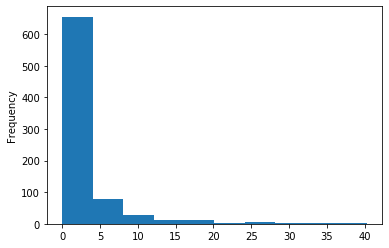

In [32]:
dependent_2015['count_ph'].plot.hist(bins=10)

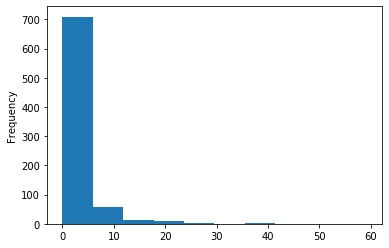

In [33]:
dependent_2016['count_ph'].plot.hist(bins=10)

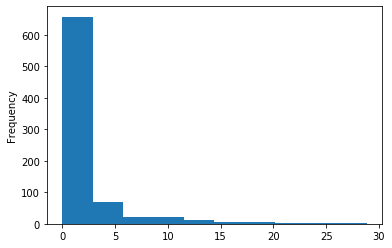

In [34]:
dependent_2017['count_ph'].plot.hist(bins=10)

In [35]:
dependent_2014['count_ph'].describe()

count    798.000000
mean       2.648492
std        5.134559
min        0.000000
25%        0.000000
50%        0.786009
75%        2.889406
max       42.765085
Name: count_ph, dtype: float64

In [36]:
dependent_2015['count_ph'].describe()

count    798.000000
mean       2.571652
std        4.866395
min        0.000000
25%        0.000000
50%        0.683825
75%        2.676553
max       40.268456
Name: count_ph, dtype: float64

In [37]:
dependent_2016['count_ph'].describe()

count    798.000000
mean       2.320816
std        5.105526
min        0.000000
25%        0.000000
50%        0.507055
75%        2.050427
max       59.210526
Name: count_ph, dtype: float64

In [38]:
dependent_2017['count_ph'].describe()

count    798.000000
mean       1.813124
std        3.772477
min        0.000000
25%        0.000000
50%        0.353170
75%        1.643732
max       28.830313
Name: count_ph, dtype: float64

In [39]:
dependent_2014['risk'] = dependent_2014['count_ph'].apply(lambda x: 1 if x > 0.3 else 0)
dependent_2015['risk'] = dependent_2015['count_ph'].apply(lambda x: 1 if x > 0.3 else 0)
dependent_2016['risk'] = dependent_2016['count_ph'].apply(lambda x: 1 if x > 0.3 else 0)
dependent_2017['risk'] = dependent_2017['count_ph'].apply(lambda x: 1 if x > 0.3 else 0)

In [40]:
dependent_2014.drop('count_ph', axis=1, inplace=True)
dependent_2015.drop('count_ph', axis=1, inplace=True)
dependent_2016.drop('count_ph', axis=1, inplace=True)
dependent_2017.drop('count_ph', axis=1, inplace=True)

In [41]:
data_2014 = dependent_2014.merge(comp_2012, how='left', on='tract' )
data_2015 = dependent_2015.merge(comp_2013, how='left', on='tract' )
data_2016 = dependent_2016.merge(comp_2014, how='left', on='tract' )
data_2017 = dependent_2017.merge(comp_2015, how='left', on='tract' )

In [42]:
data_2014[data_2014['risk']==1].describe()

,tract,risk,buss_licences,building_violations,vehicle_theft,burglary,robbery,public_peace_violation,weapons_violation,sexual_assault,...,S1401_C02_030E,S1501_C02_002E,S1501_C02_008E,S1601_C02_003E,S1701_C03_001E,S1810_C03_001E,S1901_C01_012E,S2201_C02_001E,S2301_C03_001E,S2701_C03_001E
count,508.000000,508.0,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,...,508.0,508.000000,508.000000,5.080000e+02,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,483976.580709,1.0,2.857874,24.513581,7.396401,11.031273,7.406311,1.632847,2.386563,0.678693,...,-888888888.0,25.682480,13.605118,-1.443564e+07,26.803150,12.362795,42211.299213,268.385827,51.595276,21.120276
std,247348.249821,0.0,5.182052,20.417760,4.176102,7.222649,6.549301,1.873238,2.518279,0.700031,...,0.0,20.402689,8.149225,9.712868e+07,14.223565,5.382188,20789.931801,182.975637,13.198659,9.035064
min,20200.000000,1.0,0.000000,0.000000,0.235239,0.667928,0.000000,0.000000,0.000000,0.000000,...,-888888888.0,0.000000,0.000000,-6.666667e+08,0.400000,1.000000,9550.000000,0.000000,5.500000,0.700000
25%,250950.000000,1.0,1.099506,10.324964,4.680499,5.722758,2.377279,0.439442,0.456575,0.159429,...,-888888888.0,8.475000,7.500000,4.657500e+01,15.500000,8.500000,27673.250000,135.750000,41.675000,15.200000
50%,490650.000000,1.0,1.902728,19.833380,6.619325,8.814556,5.752469,1.032266,1.612905,0.523287,...,-888888888.0,24.500000,13.100000,5.780000e+01,25.550000,11.700000,38147.500000,232.500000,51.450000,20.400000
75%,691325.000000,1.0,3.116236,32.392382,9.672468,14.935309,11.147354,2.134538,3.507034,0.970246,...,-888888888.0,40.050000,18.700000,7.712500e+01,36.600000,16.000000,50910.000000,360.000000,60.725000,27.125000
max,843900.000000,1.0,75.679172,135.211268,28.442146,45.286817,39.142591,13.888889,17.094017,4.527814,...,-888888888.0,100.000000,46.200000,1.000000e+02,66.900000,31.100000,155500.000000,1035.000000,86.800000,52.100000


In [43]:
data_2014[data_2014['risk']==0].describe()

,tract,risk,buss_licences,building_violations,vehicle_theft,burglary,robbery,public_peace_violation,weapons_violation,sexual_assault,...,S1401_C02_030E,S1501_C02_002E,S1501_C02_008E,S1601_C02_003E,S1701_C03_001E,S1810_C03_001E,S1901_C01_012E,S2201_C02_001E,S2301_C03_001E,S2701_C03_001E
count,290.000000,290.0,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,289.0,2.890000e+02,289.000000,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,263753.882759,0.0,3.792998,10.082291,4.796314,6.219557,3.179939,0.667483,0.477546,0.376747,...,-888888888.0,-2.306791e+06,6.604844,-2.306741e+06,17.807958,8.861938,59397.460208,140.031142,64.568858,16.041869
std,270709.611374,0.0,5.752654,9.192982,4.724295,4.077827,3.500962,1.351882,0.795966,0.615924,...,0.0,3.921569e+07,6.548572,3.921569e+07,12.595630,4.982762,25443.164563,153.653501,12.380257,9.742017
min,10100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-888888888.0,-6.666667e+08,0.000000,-6.666667e+08,0.800000,0.300000,11650.000000,0.000000,24.100000,0.800000
25%,61575.000000,0.0,0.996016,3.101212,2.249213,3.347280,1.125704,0.000000,0.000000,0.000000,...,-888888888.0,0.000000e+00,1.600000,5.190000e+01,8.400000,5.200000,40722.000000,34.000000,58.500000,8.100000
50%,150451.500000,0.0,2.199010,7.222389,3.544956,5.438724,2.129472,0.316156,0.266738,0.165317,...,-888888888.0,6.600000e+00,5.100000,6.360000e+01,15.100000,8.400000,54423.000000,91.000000,62.800000,14.500000
75%,381250.000000,0.0,4.126142,14.541558,5.707297,8.137432,4.026611,0.776699,0.631114,0.519076,...,-888888888.0,2.260000e+01,9.400000,7.470000e+01,23.900000,11.000000,76979.000000,193.000000,73.900000,21.400000
max,842300.000000,0.0,66.461775,43.750000,34.755134,23.587005,28.436019,16.355140,6.230530,4.739336,...,-888888888.0,9.180000e+01,31.500000,1.000000e+02,74.000000,36.000000,134018.000000,1012.000000,91.700000,49.200000


In [44]:
data_2014.drop('tract', axis=1, inplace=True)
data_2015.drop('tract', axis=1, inplace=True)
data_2016.drop('tract', axis=1, inplace=True)
data_2017.drop('tract', axis=1, inplace=True)

In [45]:
data_2014.to_csv('clean_data\data_2014.csv', index=False)
data_2015.to_csv('clean_data\data_2015.csv', index=False)
data_2016.to_csv('clean_data\data_2016.csv', index=False)
data_2017.to_csv('clean_data\data_2017.csv', index=False)